### Домашнє завдання: Пониження розмірностей для Аналізу Портретів Клієнтів

#### Контекст
В цьому ДЗ ми попрацюємо з методами пониження розмірності на наборі даних для задачі аналізу портретів клієнтів (Customer Personality Analysis). **В попередньому ДЗ ми працювали з цими даними використовуючи кластеризацію, зараз використаємо кластеризацію і візуалізауємо результати з різними методами.**

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


Для початку, запустіть код нижче. Всі ці кроки ми робили в попередньому ДЗ і для того, щоб результати кластеризації у нас були схожими, потрібно аби передобробка була однаковою.

In [1]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# 2. Обробка пропущених значень
df['Income_not_filled'] = df.Income.isna()
df.Income = df.Income.fillna(-1)

# 3. Обробка дати реєстрації
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

# 4. Категоризація рівня освіти
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

# 5. Очищення сімейного стану
marital_status_map = {'Alone': 'Single', 'Absurd': 'Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

# 6. Форматування доходу і видалення викиду
df.Income = df.Income.astype(int)
df = df[df.Income != 666666]

# 7. Створення фінального набору даних
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)
X.reset_index(drop=True, inplace=True)

In [2]:
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Income_not_filled,days_lifetime,years_customer,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,marital_Else,marital_Single
0,1957,58138,0,0,58,635,88,546,172,88,...,False,663,57,0,0,1,0,0,0,0
1,1954,46344,1,1,38,11,1,6,2,1,...,False,113,60,0,0,1,0,0,0,0
2,1965,71613,0,0,26,426,49,127,111,21,...,False,312,49,0,0,1,0,0,0,0
3,1984,26646,1,0,26,11,4,20,10,3,...,False,139,30,0,0,1,0,0,0,0
4,1981,58293,1,0,94,173,43,118,46,27,...,False,161,33,0,0,0,0,1,0,0


### Завдання 1: Виконання кластеризації та пониження розмірності для візуалізації результатів

Ваше завдання — провести кластеризацію клієнтів та візуалізувати результати кластеризації, використовуючи метод головних компонент (PCA) для пониження розмірності даних.

#### Інструкції:

1. **Вибір ключових характеристик:**
   Давайте обмежимось тільки наступними хараткеристиками для кластеризації цього разу:
   - `Income`: Річний дохід домогосподарства клієнта
   - `Recency`: Кількість днів з моменту останньої покупки клієнта
   - `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
   - `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
   - `days_lifetime`: Кількість днів з моменту реєстрації клієнта у компанії
   - `years_customer`: Вік клієнта
   - `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць
   Відберіть в наборі даних `X` лише ці характеристики.

2. **Стандартизація даних:**
   Використайте метод `StandardScaler` для стандартизації значень обраних характеристик.
   
   **Чому не MinMaxScaler:**
   - Для PCA краще використовувати StandardScaler, бо він вирівнює дисперсію ознак, на відміну від MinMaxScaler, що просто масштабує значення без врахування варіації.

   - Для K-Means також краще використовувати StandardScaler, бо алгоритм чутливий до масштабів: фічі з більшими значеннями сильніше впливають на обчислення відстаней, що може спотворити кластери.

3. **Кластеризація:**
   Проведіть кластеризацію клієнтів, використовуючи метод `KMeans` з трьома кластерами.

4. **Пониження розмірності:**
   Використайте метод головних компонент (PCA) для пониження розмірності даних до трьох компонент.

5. **Візуалізація результатів:**
   Використовуючи plolty express побудуйте 3D-графік розподілу клієнтів у просторі трьох головних компонент, де кольором позначено кластери.

6. **Опишіть, що спостерігаєте:**
   Чи кластеризація чітко розділила дані?

Далі ми детальніше проінтерпретуємо результати візуалізації і пониження розмірностей.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

In [4]:
#Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Кластеризація
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

In [7]:
#Пониження розмірності
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]

In [8]:
#Візуалізація результатів
fig = px.scatter_3d(
    df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='cluster',
    title='3D-візуалізація кластерів (PCA + KMeans)',
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()

На мою думку, так, кластеризація добре розділила дані. Можна побачити три окремі "кучки", які чітко окреслюються.

### Завдання 2: Аналіз результатів пониження розмірності

1. **Розрахунок частки поясненої дисперсії:**
   Визначте, яка частка загальної варіації даних пояснюється кожною з трьох головних компонент (PC1, PC2, PC3) за допомогою атрибуту `explained_variance_ratio_` об'єкта PCA. Виведіть результат на екран.

2. **Розрахунок кумулятивної частки поясненої дисперсії:**
   Обчисліть кумулятивну частку поясненої дисперсії для трьох головних компонент, щоб зрозуміти, скільки варіації даних пояснюється першими кількома компонентами.

In [10]:
pca.explained_variance_ratio_

array([0.20421636, 0.07901681, 0.06017764])

По цим результатам ми бачимо, що рса1 пояснює близько 20% інформації, рса2 - 0,07% та рса3 - 0,06%. Загалом за методом пониження ми маємо змогу розглянути близько 34% даних дисперсії.

In [11]:
import numpy as np

explained_variance_ratio = np.array([0.20421636, 0.07901681, 0.06017764])
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)

[0.20421636 0.28323317 0.34341081]


Тепер маємо рса1 пояснює близько 20% (без змін), рса2 - 0,28% та рса3 - 0,34%

### Завдання 3: Інтерпретація "Loadings"

Продовжуємо інтерпретацію результатів `PCA`і познайомимось з новим поняттям `loadings`, яке допоможе нам знайти звʼязок між головними компонентами і оригінальними ознаками в наборі даних.

Ми зараз побудували візуалізацію кластерів точок даних в просторі трьох головних компонент. Але хочеться знайти звʼязок між головними компонентами і оригінальними ознаками. Для розуміння, які початкові характеристики даних мають найбільший вплив на ці головні компоненти, ми можемо використати атрибут `components_` методу `PCA`.

#### Що таке `pca.components_`?

`pca.components_` — це масив, який містить коефіцієнти (або "ваги"), що показують внесок кожної вихідної ознаки у кожну з головних компонент. Ці коефіцієнти ще називаються **"loading"** або "навантаженнями" компонент.

- **Loadings** (`навантаження`) відображають важливість кожної змінної (ознаки) для відповідної головної компоненти. Вони показують, яким чином змінні поєднуються, щоб утворити нові, зменшені вимірювання.
- Якщо коефіцієнт має високе абсолютне значення (як позитивне, так і негативне), це вказує на те, що відповідна змінна сильно впливає на головну компоненту.

#### Саме завдання
Ваше завдання — обчислити "навантаження" для кожної з головних компонент і інтерпретувати результати.

1. **Обчислення loadings для компонент:**
   Використайте атрибут `components_` об'єкта PCA для створення DataFrame, який відображатиме внесок кожної вихідної ознаки в кожну головну компоненту.

2. **Інтерпретація результатів:**
   Виведіть значення "навантажень" і проаналізуйте, які ознаки найбільше впливають на кожну головну компоненту.

In [16]:
pca = PCA(n_components=3)
pca.fit(X_scaled)

PCA(n_components=3)

In [17]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_.T,  # транспонуємо, щоб фічі були рядками
    columns=['PC1', 'PC2', 'PC3'],
    index=X.columns
)

print(loadings)

                           PC1           PC2       PC3
Year_Birth           -0.070400  5.012821e-01  0.117148
Income                0.324437 -6.667645e-02 -0.018870
Kidhome              -0.252797  9.548915e-02  0.082528
Teenhome             -0.045956 -4.266917e-01 -0.036325
Recency               0.001427 -2.030276e-02 -0.111331
MntWines              0.303772 -1.064706e-01  0.213711
MntFruits             0.260020  1.248232e-01 -0.184516
MntMeatProducts       0.305601  1.120134e-01 -0.035921
MntFishProducts       0.269770  1.252557e-01 -0.188402
MntSweetProducts      0.261746  1.195488e-01 -0.159640
MntGoldProds          0.216762  9.891019e-03 -0.067251
NumDealsPurchases    -0.050419 -2.406144e-01  0.093459
NumWebPurchases       0.209792 -1.758565e-01  0.071461
NumCatalogPurchases   0.313744  4.801015e-03  0.001854
NumStorePurchases     0.280181 -9.988442e-02 -0.058838
NumWebVisitsMonth    -0.242686 -6.658746e-02  0.224081
AcceptedCmp3          0.018105  7.762768e-02  0.201301
AcceptedCm

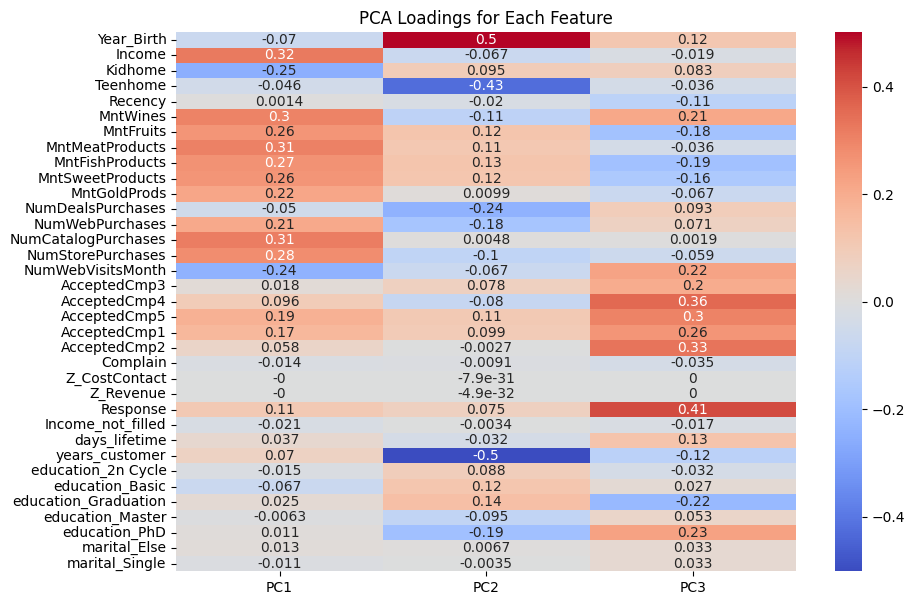

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings for Each Feature")
plt.show()

З heatmap ми можемо бачити які фічі найбільше впливають на кожну з трьох компонентів. На  

*   компонент1 вплив - Income, MntMeatProducts, NumCatalogPurchases
*   компонен2 вплив - Year Birth, education_Graduation, MntFishProducts
*   компонен3 вплив - Response, AcceptedCmp4, AcceptedCmp2
Тут я вивела Топ-3 фіч по впливу



###Завдання 4
Давайте проаналізуємо "навантаження" (**loadings**) для трьох головних компонент після вилучення ознаки `Income`. Це допоможе нам зрозуміти, як змінилася важливість інших ознак для кожної головної компоненти, коли одна з ключових характеристик (`Income`) була вилучена.

#### Кроки для проведення аналізу і ваше завдання:

1. Видаліть ознаку `Income` з нашого набору даних `X` і повторно виконайте PCA (метод головних компонент) для отримання нових "навантажень".

2. Обчисліть нові "навантаження" для трьох головних компонент на наборі даних без `Income`

3. Проаналізуйте, які ознаки мають найбільший вплив на кожну головну компоненту після вилучення `Income`.

4. Перегляньте, наскільки кожна з головних компонент пояснює дисперсію в даних без ознаки `Income`.

In [21]:
# створення датафрейму без Income
X_no_income = X.drop(columns=['Income'])

#Стандартизація даних
scaler = StandardScaler()
X_no_income_scaled = scaler.fit_transform(X_no_income)

#Пониження розмірності для трьох комп.
pca_no_income = PCA(n_components=3)
pca_no_income.fit(X_no_income_scaled)


PCA(n_components=3)

In [22]:
loadings_no_income = pd.DataFrame(
    pca_no_income.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=X_no_income.columns
)

print("🔹 Loadings після вилучення Income:")
print(loadings_no_income.round(3))

🔹 Loadings після вилучення Income:
                        PC1    PC2    PC3
Year_Birth           -0.069 -0.506  0.118
Kidhome              -0.267 -0.106  0.084
Teenhome             -0.058  0.424 -0.040
Recency               0.002  0.020 -0.112
MntWines              0.318  0.118  0.210
MntFruits             0.278 -0.114 -0.188
MntMeatProducts       0.322 -0.102 -0.037
MntFishProducts       0.289 -0.113 -0.192
MntSweetProducts      0.280 -0.108 -0.163
MntGoldProds          0.235  0.004 -0.075
NumDealsPurchases    -0.054  0.244  0.084
NumWebPurchases       0.221  0.188  0.062
NumCatalogPurchases   0.330  0.006 -0.001
NumStorePurchases     0.293  0.110 -0.063
NumWebVisitsMonth    -0.248  0.066  0.218
AcceptedCmp3          0.023 -0.074  0.200
AcceptedCmp4          0.100  0.084  0.357
AcceptedCmp5          0.199 -0.103  0.307
AcceptedCmp1          0.178 -0.092  0.262
AcceptedCmp2          0.062  0.006  0.334
Complain             -0.015  0.009 -0.035
Z_CostContact         0.000 -0.000  0.000

In [25]:
#Розрахунок частки поясненої дисперсії
pca_no_income.explained_variance_ratio_

array([0.18959909, 0.08112031, 0.06203926])

По результатам пояснювальна дисперсія без income пояснює нам лише 33%. Порівнюючи з датафреймом з income 33%, різниця тільки 1%.

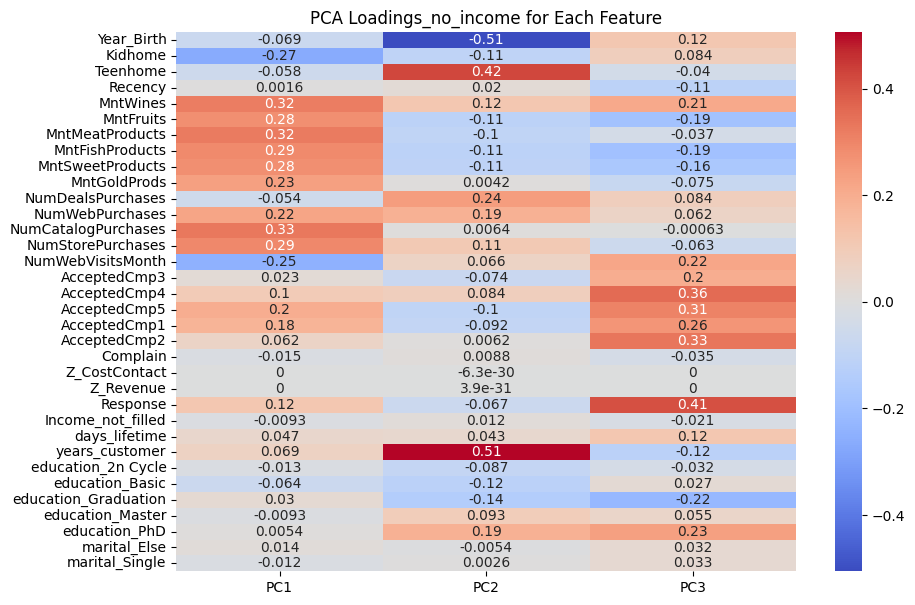

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(loadings_no_income, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings_no_income for Each Feature")
plt.show()

З heatmap ми можемо бачити які фічі найбільше впливають на кожну з трьох компонентів. На

*   компонент1 вплив - NumCatalogPurchases, MntWines, MntMeatProducts
*   компонен2 вплив - years_customer, Teenhome, NumDealsPurchases
*   компонен3 вплив - Response, AcceptedCmp4, AcceptedCmp2 (без змін)

Тут я вивела Топ-3 фіч по впливу




### Завдання 5: Візуалізація кластеризації за допомогою t-SNE

Ваше завдання — використати метод t-SNE для візуалізації результатів кластеризації клієнтів у двовимірному просторі. Метод t-SNE допомагає знизити розмірність даних та зберегти локальні структури в даних, що робить його ефективним для візуалізації високорозмірних даних. Ми також зможемо порівняти результат цього методу з РСА.

1. Використайте метод t-SNE для зниження розмірності до 2х вимірів даних, які включають ознаки всі, що і в завданні 1, а також були відмасштабовані перед пониженням розмірностей.

2. Створіть новий DataFrame з координатами, отриманими після застосування t-SNE, та додайте до нього мітки кластерів.

3. Побудуйте інтерактивний 2D-графік розподілу клієнтів, де кольором буде позначено різні кластери і проаналізуйте графік з рекомендаціями нижче (можливо треба буде вивести додаткові візуалізації чи таблиці для інтерпретації, але треба прям зрозуміти, які ознаки формують який кластер і чим кластери відрізняються одне від одного).

  **Опишіть отримані кластери з точки зору ознак.**

4. Опишіть відмінність графіка tSNE від PCA.

#### ЯК можна інтерпретувати з t-SNE?

Хоча t-SNE не надає "компонентів" як РСА, він забезпечує низьковимірне представлення даних, яке можна візуально інтерпретувати:

- **Кластери:** t-SNE особливо добре показує кластери подібних точок. Якщо ви бачите чітко визначені кластери на графіку t-SNE, це свідчить про наявність груп схожих спостережень у ваших даних. Проаналізувати їх можемо, якщо додамо дані в `hover_data` або якщо якісь з даних виведемо як розмір чи форма точок на візуалізації. Також корисно може бути вивести середні значення ознак по кластерам.
- **Локальна структура:** Відносне розташування точок одного кластеру на графіку t-SNE може допомогти вам зрозуміти, які дані подібні між собою.
- **Глобальна структура:** Будьте обережні; t-SNE менш надійний для відображення глобальних структур (наприклад, відстаней між кластерами) у порівнянні з PCA, бо t-SNE націлений на збереження саме локальних структур.

In [28]:
from sklearn.manifold import TSNE
import plotly.express as px

# Вибір фіч
features = ['Income', 'Recency', 'NumStorePurchases',
            'NumDealsPurchases', 'days_lifetime',
            'years_customer', 'NumWebVisitsMonth']

X = df[features]

# Стандартизація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#результати кластеризації
X_clusters = pd.DataFrame(X_scaled, columns=features)
X_clusters['Cluster'] = kmeans.labels_


In [29]:
tsne = TSNE(
    n_components=2,
    perplexity=30,        # баланс між локальною та глобальною структурою
    learning_rate=200,
    n_iter=1000,
    random_state=42
)

tsne_results = tsne.fit_transform(X_scaled)

# новий датафрейм із координатами
df_tsne = pd.DataFrame(tsne_results, columns=['tSNE1', 'tSNE2'])
df_tsne['Cluster'] = kmeans.labels_


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [30]:
fig = px.scatter(
    df_tsne,
    x='tSNE1',
    y='tSNE2',
    color=df_tsne['Cluster'].astype(str),
    title="Візуалізація кластерів методом t-SNE",
    color_discrete_sequence=px.colors.qualitative.Plotly,
    hover_data=['Cluster']
)
fig.show()

In [31]:
df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)

           Income  Recency  NumStorePurchases  NumDealsPurchases  \
Cluster                                                            
0        57570.46    48.99               7.56               3.53   
1        33644.97    49.03               3.19               2.08   
2        75973.91    49.43               8.35               1.32   

         days_lifetime  years_customer  NumWebVisitsMonth  
Cluster                                                    
0               392.82           51.15               5.55  
1               324.87           41.33               6.52  
2               358.06           45.01               2.86  


Ця табличка допоможе мені описати мій графік та кластери. Отже, ми бачимо:

*    0- його можна описати так, що середній дохід близько 57к, середня к-ть днів з останньої покупки 48, к-ть покупок близько 7, ці клієнти найбільше купують зі знижками, також клієнти цього кластера найдовше з компанією (392 дня), середній вік клієнтів 51, що каже нам про фінансову стабільність, та ці клієнти відвідували вебсайт за останній місяць 5 разів.

*   1-й клас - середній дохід близько 33к (що є найменшим), середня к-ть днів з останньої покупки 49, к-ть покупок близько 3(що є найменшим), к-ть покупок зі знижками 2, клієнти цього кластеру наменше з компанією (324 дня), середній вік 41 (що є найменшим), та ці клієнти відвідували вебсайт за останній місяць 6 разів.
*   2- його можна описати так, що середній дохід близько 75к(що є найбільшим), середня к-ть днів з останньої покупки 49, к-ть покупок близько 8 (що є найбільшим), ці клієнти найменше купують зі знижками, також клієнти цього кластера займають середн позиціюпо часу з компанією (358 днів), середній вік клієнтів 45, та ці клієнти відвідували вебсайт за останній місяць близько 3-х разів.


---





Щодо відмінностей графіка tSNE від PCA, можу сказати, що tSNE для мене був набагато легший в сприйняті. Через те, що я звикла до такої розмірності на відміну від PCA. tSNE графік показує +- чіткий поділ одразу по кластерам